Note: a high-memory runtime (around 80 GB) is required to run this notebook.

# Imports

In [ ]:
!pip install blobfile

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import blobfile as bf
import os
import json
import ast
from collections import OrderedDict, Counter

# Load results
Load data from blob storage.

In [ ]:
def read_progress(base_path):
    with bf.BlobFile(bf.join(base_path, "progress.csv")) as f:
        return pd.read_csv(f)


def read_metadata(base_path):
    with bf.BlobFile(bf.join(base_path, "metadata.json")) as f:
        kwargs = OrderedDict(json.load(f)["kwargs"])
    for k, v in kwargs.items():
        try:
            kwargs[k] = ast.literal_eval(v)
        except (ValueError, SyntaxError):
            kwargs[k] = v
    return kwargs


def read_workers(base_path):
    with bf.BlobFile(bf.join(base_path, "workers.txt")) as f:
        return int(f.read())


def read_result(base_path):
    return {
        "progress": read_progress(base_path),
        "metadata": read_metadata(base_path),
        "workers": read_workers(base_path),
    }


def parallel_map(f, inputs, *, max_workers=16):
    import concurrent.futures
    from ipywidgets import IntProgress
    from IPython.display import display

    progress_bar = IntProgress(min=0, max=len(inputs))
    display(progress_bar)
    outputs = [None for _ in range(len(inputs))]
    with concurrent.futures.ThreadPoolExecutor(max_workers=max_workers) as executor:
        future_to_index = {
            executor.submit(f, input): index for index, input in enumerate(inputs)
        }
        for future in concurrent.futures.as_completed(future_to_index):
            index = future_to_index[future]
            outputs[index] = future.result()
            progress_bar.value += 1
    return outputs

In [ ]:
BUCKET_PATH = "https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/"


def read_results(dir_path, **kwargs):
    f = lambda subdir: read_result(bf.join(dir_path, subdir))
    subdirs = list(bf.listdir(dir_path))
    print(f"Loading {dir_path}...")
    return parallel_map(f, subdirs, **kwargs)


def read_result_tree(dir_path):
    subdirs = list(bf.listdir(dir_path))
    if all(subdir.isnumeric() for subdir in subdirs):
        return read_results(bf.join(dir_path))
    else:
        return {
            subdir: read_result_tree(bf.join(dir_path, subdir)) for subdir in subdirs
        }

In [ ]:
result_tree = read_result_tree(BUCKET_PATH)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/fixed_prox_ewma/bigfish...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/fixed_prox_ewma/bossfight...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/fixed_prox_ewma/caveflyer...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/fixed_prox_ewma/chaser...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/fixed_prox_ewma/climber...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/fixed_prox_ewma/coinrun...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/fixed_prox_ewma/dodgeball...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/fixed_prox_ewma/fruitbot...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/fixed_prox_ewma/heist...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/fixed_prox_ewma/jumper...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/fixed_prox_ewma/leaper...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/fixed_prox_ewma/maze...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/fixed_prox_ewma/miner...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/fixed_prox_ewma/ninja...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/fixed_prox_ewma/plunder...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/fixed_prox_ewma/starpilot...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/linear_lr/bigfish...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/linear_lr/bossfight...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/linear_lr/caveflyer...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/linear_lr/chaser...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/linear_lr/climber...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/linear_lr/coinrun...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/linear_lr/dodgeball...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/linear_lr/fruitbot...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/linear_lr/heist...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/linear_lr/jumper...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/linear_lr/leaper...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/linear_lr/maze...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/linear_lr/miner...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/linear_lr/ninja...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/linear_lr/plunder...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/linear_lr/starpilot...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_adv_norm_ewma/bigfish...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_adv_norm_ewma/bossfight...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_adv_norm_ewma/caveflyer...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_adv_norm_ewma/chaser...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_adv_norm_ewma/climber...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_adv_norm_ewma/coinrun...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_adv_norm_ewma/dodgeball...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_adv_norm_ewma/fruitbot...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_adv_norm_ewma/heist...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_adv_norm_ewma/jumper...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_adv_norm_ewma/leaper...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_adv_norm_ewma/maze...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_adv_norm_ewma/miner...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_adv_norm_ewma/ninja...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_adv_norm_ewma/plunder...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_adv_norm_ewma/starpilot...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_lr/bigfish...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_lr/bossfight...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_lr/caveflyer...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_lr/chaser...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_lr/climber...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_lr/coinrun...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_lr/dodgeball...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_lr/fruitbot...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_lr/heist...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_lr/jumper...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_lr/leaper...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_lr/maze...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_lr/miner...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_lr/ninja...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_lr/plunder...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_lr/starpilot...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_prox_ewma/bigfish...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_prox_ewma/bossfight...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_prox_ewma/caveflyer...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_prox_ewma/chaser...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_prox_ewma/climber...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_prox_ewma/coinrun...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_prox_ewma/dodgeball...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_prox_ewma/fruitbot...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_prox_ewma/heist...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_prox_ewma/jumper...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_prox_ewma/leaper...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_prox_ewma/maze...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_prox_ewma/miner...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_prox_ewma/ninja...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_prox_ewma/plunder...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/ablations/no_prox_ewma/starpilot...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/head_to_head/bigfish...


IntProgress(value=0, max=16)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/head_to_head/bossfight...


IntProgress(value=0, max=16)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/head_to_head/caveflyer...


IntProgress(value=0, max=16)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/head_to_head/chaser...


IntProgress(value=0, max=16)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/head_to_head/climber...


IntProgress(value=0, max=16)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/head_to_head/coinrun...


IntProgress(value=0, max=16)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/head_to_head/dodgeball...


IntProgress(value=0, max=16)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/head_to_head/fruitbot...


IntProgress(value=0, max=16)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/head_to_head/heist...


IntProgress(value=0, max=16)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/head_to_head/jumper...


IntProgress(value=0, max=16)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/head_to_head/leaper...


IntProgress(value=0, max=16)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/head_to_head/maze...


IntProgress(value=0, max=16)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/head_to_head/miner...


IntProgress(value=0, max=16)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/head_to_head/ninja...


IntProgress(value=0, max=16)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/head_to_head/plunder...


IntProgress(value=0, max=16)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/head_to_head/starpilot...


IntProgress(value=0, max=16)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/main/bigfish...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/main/bossfight...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/main/caveflyer...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/main/chaser...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/main/climber...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/main/coinrun...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/main/dodgeball...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/main/fruitbot...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/main/heist...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/main/jumper...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/main/leaper...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/main/maze...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/main/miner...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/main/ninja...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/main/plunder...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/main/starpilot...


IntProgress(value=0, max=15)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/other/kl_penalty_vs_ewma/starpilot...


IntProgress(value=0, max=162)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/other/small_kl_penalty/bigfish...


IntProgress(value=0, max=4)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/other/small_kl_penalty/bossfight...


IntProgress(value=0, max=4)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/other/small_kl_penalty/caveflyer...


IntProgress(value=0, max=4)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/other/small_kl_penalty/chaser...


IntProgress(value=0, max=4)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/other/small_kl_penalty/climber...


IntProgress(value=0, max=4)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/other/small_kl_penalty/coinrun...


IntProgress(value=0, max=4)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/other/small_kl_penalty/dodgeball...


IntProgress(value=0, max=4)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/other/small_kl_penalty/fruitbot...


IntProgress(value=0, max=4)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/other/small_kl_penalty/heist...


IntProgress(value=0, max=4)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/other/small_kl_penalty/jumper...


IntProgress(value=0, max=4)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/other/small_kl_penalty/leaper...


IntProgress(value=0, max=4)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/other/small_kl_penalty/maze...


IntProgress(value=0, max=4)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/other/small_kl_penalty/miner...


IntProgress(value=0, max=4)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/other/small_kl_penalty/ninja...


IntProgress(value=0, max=4)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/other/small_kl_penalty/plunder...


IntProgress(value=0, max=4)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/other/small_kl_penalty/starpilot...


IntProgress(value=0, max=4)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/behavior/bigfish...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/behavior/bossfight...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/behavior/caveflyer...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/behavior/chaser...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/behavior/climber...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/behavior/coinrun...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/behavior/dodgeball...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/behavior/fruitbot...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/behavior/heist...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/behavior/jumper...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/behavior/leaper...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/behavior/maze...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/behavior/miner...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/behavior/ninja...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/behavior/plunder...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/behavior/starpilot...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/decoupled/bigfish...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/decoupled/bossfight...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/decoupled/caveflyer...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/decoupled/chaser...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/decoupled/climber...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/decoupled/coinrun...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/decoupled/dodgeball...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/decoupled/fruitbot...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/decoupled/heist...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/decoupled/jumper...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/decoupled/leaper...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/decoupled/maze...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/decoupled/miner...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/decoupled/ninja...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/decoupled/plunder...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/decoupled/starpilot...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/proximal/bigfish...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/proximal/bossfight...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/proximal/caveflyer...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/proximal/chaser...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/proximal/climber...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/proximal/coinrun...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/proximal/dodgeball...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/proximal/fruitbot...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/proximal/heist...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/proximal/jumper...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/proximal/leaper...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/proximal/maze...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/proximal/miner...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/proximal/ninja...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/proximal/plunder...


IntProgress(value=0, max=28)

Loading https://openaipublic.blob.core.windows.net/rl-batch-size-invariance/staleness/proximal/starpilot...


IntProgress(value=0, max=28)

#Pre-process results
Clean data and aggregate over environment interactions.

In [ ]:
INTERACTS_INCREMENT = 2 ** 20  # 4096 > 1000 interacts per parallel env
REWARD_RANGES = {
    "coinrun": {"hard": (5, 10), "easy": (5, 10)},
    "starpilot": {"hard": (1.5, 35), "easy": (2.5, 64)},
    "caveflyer": {"hard": (2, 13.4), "easy": (3.5, 12)},
    "dodgeball": {"hard": (1.5, 19), "easy": (1.5, 19)},
    "fruitbot": {"hard": (-0.5, 27.2), "easy": (-1.5, 32.4)},
    "chaser": {"hard": (0.5, 14.2), "easy": (0.5, 13)},
    "miner": {"hard": (1.5, 20), "easy": (1.5, 13)},
    "jumper": {"hard": (1, 10), "easy": (3, 10)},
    "leaper": {"hard": (1.5, 10), "easy": (3, 10)},
    "maze": {"hard": (4, 10), "easy": (5, 10)},
    "bigfish": {"hard": (0, 40), "easy": (1, 40)},
    "heist": {"hard": (2, 10), "easy": (3.5, 10)},
    "climber": {"hard": (1, 12.6), "easy": (2, 12.6)},
    "plunder": {"hard": (3, 30), "easy": (4.5, 30)},
    "ninja": {"hard": (2, 10), "easy": (3.5, 10)},
    "bossfight": {"hard": (0.5, 13), "easy": (0.5, 13)},
}


def preprocess_result(result):
    if "progress_raw" not in result:
        result["progress_raw"] = result["progress"]
    df = result["progress_raw"]
    df = df[np.isfinite(df["Misc/InteractCount"])].copy()
    adv_keys = ["Misc/InteractCount", "VFStats/AdvStd", "VFStats/AdvEwmaStd"]
    result["progress_adv"] = df[[k for k in adv_keys if k in df.columns]].rename(
        columns={"Misc/InteractCount": "interacts"}
    )
    df["interacts"] = (
        ((df["Misc/InteractCount"] - 1) // INTERACTS_INCREMENT) + 1
    ) * INTERACTS_INCREMENT
    df["interacts"] = np.minimum(df["interacts"], df["Misc/InteractCount"].max())
    df["NewEpRewSum"] = df["NewEpNum"] * df["NewEpRewMean"]
    agg_dict = {"NewEpNum": "sum", "NewEpRewSum": "sum"}
    for agg_key in ["Opt/clipfrac", "Opt/approxkl"]:
        if agg_key in df.columns:
            agg_dict[agg_key] = "mean"
    df = df.groupby("interacts").agg(agg_dict).reset_index()
    df["reward"] = df["NewEpRewSum"] / df["NewEpNum"]
    df.drop(columns=["NewEpNum", "NewEpRewSum"], inplace=True)
    reward_range = REWARD_RANGES[result["metadata"]["env_name"]]["hard"]
    df["reward_norm"] = (df["reward"] - reward_range[0]) / (
        reward_range[1] - reward_range[0]
    )
    result["progress"] = df


def preprocess_result_tree(result_tree, *, tree_path=()):
    subtree = result_tree
    for path_item in tree_path:
        subtree = subtree[path_item]
    if isinstance(subtree, list):
        print(f"Pre-processing {'/'.join(tree_path)}...")
        parallel_map(preprocess_result, subtree)
    else:
        for new_path_item in subtree.keys():
            subpath = tree_path + (new_path_item,)
            preprocess_result_tree(result_tree, tree_path=subpath)

In [ ]:
preprocess_result_tree(result_tree)

Pre-processing ablations/fixed_prox_ewma/bigfish...


IntProgress(value=0, max=15)

Pre-processing ablations/fixed_prox_ewma/bossfight...


IntProgress(value=0, max=15)

Pre-processing ablations/fixed_prox_ewma/caveflyer...


IntProgress(value=0, max=15)

Pre-processing ablations/fixed_prox_ewma/chaser...


IntProgress(value=0, max=15)

Pre-processing ablations/fixed_prox_ewma/climber...


IntProgress(value=0, max=15)

Pre-processing ablations/fixed_prox_ewma/coinrun...


IntProgress(value=0, max=15)

Pre-processing ablations/fixed_prox_ewma/dodgeball...


IntProgress(value=0, max=15)

Pre-processing ablations/fixed_prox_ewma/fruitbot...


IntProgress(value=0, max=15)

Pre-processing ablations/fixed_prox_ewma/heist...


IntProgress(value=0, max=15)

Pre-processing ablations/fixed_prox_ewma/jumper...


IntProgress(value=0, max=15)

Pre-processing ablations/fixed_prox_ewma/leaper...


IntProgress(value=0, max=15)

Pre-processing ablations/fixed_prox_ewma/maze...


IntProgress(value=0, max=15)

Pre-processing ablations/fixed_prox_ewma/miner...


IntProgress(value=0, max=15)

Pre-processing ablations/fixed_prox_ewma/ninja...


IntProgress(value=0, max=15)

Pre-processing ablations/fixed_prox_ewma/plunder...


IntProgress(value=0, max=15)

Pre-processing ablations/fixed_prox_ewma/starpilot...


IntProgress(value=0, max=15)

Pre-processing ablations/linear_lr/bigfish...


IntProgress(value=0, max=15)

Pre-processing ablations/linear_lr/bossfight...


IntProgress(value=0, max=15)

Pre-processing ablations/linear_lr/caveflyer...


IntProgress(value=0, max=15)

Pre-processing ablations/linear_lr/chaser...


IntProgress(value=0, max=15)

Pre-processing ablations/linear_lr/climber...


IntProgress(value=0, max=15)

Pre-processing ablations/linear_lr/coinrun...


IntProgress(value=0, max=15)

Pre-processing ablations/linear_lr/dodgeball...


IntProgress(value=0, max=15)

Pre-processing ablations/linear_lr/fruitbot...


IntProgress(value=0, max=15)

Pre-processing ablations/linear_lr/heist...


IntProgress(value=0, max=15)

Pre-processing ablations/linear_lr/jumper...


IntProgress(value=0, max=15)

Pre-processing ablations/linear_lr/leaper...


IntProgress(value=0, max=15)

Pre-processing ablations/linear_lr/maze...


IntProgress(value=0, max=15)

Pre-processing ablations/linear_lr/miner...


IntProgress(value=0, max=15)

Pre-processing ablations/linear_lr/ninja...


IntProgress(value=0, max=15)

Pre-processing ablations/linear_lr/plunder...


IntProgress(value=0, max=15)

Pre-processing ablations/linear_lr/starpilot...


IntProgress(value=0, max=15)

Pre-processing ablations/no_adv_norm_ewma/bigfish...


IntProgress(value=0, max=15)

Pre-processing ablations/no_adv_norm_ewma/bossfight...


IntProgress(value=0, max=15)

Pre-processing ablations/no_adv_norm_ewma/caveflyer...


IntProgress(value=0, max=15)

Pre-processing ablations/no_adv_norm_ewma/chaser...


IntProgress(value=0, max=15)

Pre-processing ablations/no_adv_norm_ewma/climber...


IntProgress(value=0, max=15)

Pre-processing ablations/no_adv_norm_ewma/coinrun...


IntProgress(value=0, max=15)

Pre-processing ablations/no_adv_norm_ewma/dodgeball...


IntProgress(value=0, max=15)

Pre-processing ablations/no_adv_norm_ewma/fruitbot...


IntProgress(value=0, max=15)

Pre-processing ablations/no_adv_norm_ewma/heist...


IntProgress(value=0, max=15)

Pre-processing ablations/no_adv_norm_ewma/jumper...


IntProgress(value=0, max=15)

Pre-processing ablations/no_adv_norm_ewma/leaper...


IntProgress(value=0, max=15)

Pre-processing ablations/no_adv_norm_ewma/maze...


IntProgress(value=0, max=15)

Pre-processing ablations/no_adv_norm_ewma/miner...


IntProgress(value=0, max=15)

Pre-processing ablations/no_adv_norm_ewma/ninja...


IntProgress(value=0, max=15)

Pre-processing ablations/no_adv_norm_ewma/plunder...


IntProgress(value=0, max=15)

Pre-processing ablations/no_adv_norm_ewma/starpilot...


IntProgress(value=0, max=15)

Pre-processing ablations/no_lr/bigfish...


IntProgress(value=0, max=15)

Pre-processing ablations/no_lr/bossfight...


IntProgress(value=0, max=15)

Pre-processing ablations/no_lr/caveflyer...


IntProgress(value=0, max=15)

Pre-processing ablations/no_lr/chaser...


IntProgress(value=0, max=15)

Pre-processing ablations/no_lr/climber...


IntProgress(value=0, max=15)

Pre-processing ablations/no_lr/coinrun...


IntProgress(value=0, max=15)

Pre-processing ablations/no_lr/dodgeball...


IntProgress(value=0, max=15)

Pre-processing ablations/no_lr/fruitbot...


IntProgress(value=0, max=15)

Pre-processing ablations/no_lr/heist...


IntProgress(value=0, max=15)

Pre-processing ablations/no_lr/jumper...


IntProgress(value=0, max=15)

Pre-processing ablations/no_lr/leaper...


IntProgress(value=0, max=15)

Pre-processing ablations/no_lr/maze...


IntProgress(value=0, max=15)

Pre-processing ablations/no_lr/miner...


IntProgress(value=0, max=15)

Pre-processing ablations/no_lr/ninja...


IntProgress(value=0, max=15)

Pre-processing ablations/no_lr/plunder...


IntProgress(value=0, max=15)

Pre-processing ablations/no_lr/starpilot...


IntProgress(value=0, max=15)

Pre-processing ablations/no_prox_ewma/bigfish...


IntProgress(value=0, max=15)

Pre-processing ablations/no_prox_ewma/bossfight...


IntProgress(value=0, max=15)

Pre-processing ablations/no_prox_ewma/caveflyer...


IntProgress(value=0, max=15)

Pre-processing ablations/no_prox_ewma/chaser...


IntProgress(value=0, max=15)

Pre-processing ablations/no_prox_ewma/climber...


IntProgress(value=0, max=15)

Pre-processing ablations/no_prox_ewma/coinrun...


IntProgress(value=0, max=15)

Pre-processing ablations/no_prox_ewma/dodgeball...


IntProgress(value=0, max=15)

Pre-processing ablations/no_prox_ewma/fruitbot...


IntProgress(value=0, max=15)

Pre-processing ablations/no_prox_ewma/heist...


IntProgress(value=0, max=15)

Pre-processing ablations/no_prox_ewma/jumper...


IntProgress(value=0, max=15)

Pre-processing ablations/no_prox_ewma/leaper...


IntProgress(value=0, max=15)

Pre-processing ablations/no_prox_ewma/maze...


IntProgress(value=0, max=15)

Pre-processing ablations/no_prox_ewma/miner...


IntProgress(value=0, max=15)

Pre-processing ablations/no_prox_ewma/ninja...


IntProgress(value=0, max=15)

Pre-processing ablations/no_prox_ewma/plunder...


IntProgress(value=0, max=15)

Pre-processing ablations/no_prox_ewma/starpilot...


IntProgress(value=0, max=15)

Pre-processing head_to_head/bigfish...


IntProgress(value=0, max=16)

Pre-processing head_to_head/bossfight...


IntProgress(value=0, max=16)

Pre-processing head_to_head/caveflyer...


IntProgress(value=0, max=16)

Pre-processing head_to_head/chaser...


IntProgress(value=0, max=16)

Pre-processing head_to_head/climber...


IntProgress(value=0, max=16)

Pre-processing head_to_head/coinrun...


IntProgress(value=0, max=16)

Pre-processing head_to_head/dodgeball...


IntProgress(value=0, max=16)

Pre-processing head_to_head/fruitbot...


IntProgress(value=0, max=16)

Pre-processing head_to_head/heist...


IntProgress(value=0, max=16)

Pre-processing head_to_head/jumper...


IntProgress(value=0, max=16)

Pre-processing head_to_head/leaper...


IntProgress(value=0, max=16)

Pre-processing head_to_head/maze...


IntProgress(value=0, max=16)

Pre-processing head_to_head/miner...


IntProgress(value=0, max=16)

Pre-processing head_to_head/ninja...


IntProgress(value=0, max=16)

Pre-processing head_to_head/plunder...


IntProgress(value=0, max=16)

Pre-processing head_to_head/starpilot...


IntProgress(value=0, max=16)

Pre-processing main/bigfish...


IntProgress(value=0, max=15)

Pre-processing main/bossfight...


IntProgress(value=0, max=15)

Pre-processing main/caveflyer...


IntProgress(value=0, max=15)

Pre-processing main/chaser...


IntProgress(value=0, max=15)

Pre-processing main/climber...


IntProgress(value=0, max=15)

Pre-processing main/coinrun...


IntProgress(value=0, max=15)

Pre-processing main/dodgeball...


IntProgress(value=0, max=15)

Pre-processing main/fruitbot...


IntProgress(value=0, max=15)

Pre-processing main/heist...


IntProgress(value=0, max=15)

Pre-processing main/jumper...


IntProgress(value=0, max=15)

Pre-processing main/leaper...


IntProgress(value=0, max=15)

Pre-processing main/maze...


IntProgress(value=0, max=15)

Pre-processing main/miner...


IntProgress(value=0, max=15)

Pre-processing main/ninja...


IntProgress(value=0, max=15)

Pre-processing main/plunder...


IntProgress(value=0, max=15)

Pre-processing main/starpilot...


IntProgress(value=0, max=15)

Pre-processing other/kl_penalty_vs_ewma/starpilot...


IntProgress(value=0, max=162)

Pre-processing other/small_kl_penalty/bigfish...


IntProgress(value=0, max=4)

Pre-processing other/small_kl_penalty/bossfight...


IntProgress(value=0, max=4)

Pre-processing other/small_kl_penalty/caveflyer...


IntProgress(value=0, max=4)

Pre-processing other/small_kl_penalty/chaser...


IntProgress(value=0, max=4)

Pre-processing other/small_kl_penalty/climber...


IntProgress(value=0, max=4)

Pre-processing other/small_kl_penalty/coinrun...


IntProgress(value=0, max=4)

Pre-processing other/small_kl_penalty/dodgeball...


IntProgress(value=0, max=4)

Pre-processing other/small_kl_penalty/fruitbot...


IntProgress(value=0, max=4)

Pre-processing other/small_kl_penalty/heist...


IntProgress(value=0, max=4)

Pre-processing other/small_kl_penalty/jumper...


IntProgress(value=0, max=4)

Pre-processing other/small_kl_penalty/leaper...


IntProgress(value=0, max=4)

Pre-processing other/small_kl_penalty/maze...


IntProgress(value=0, max=4)

Pre-processing other/small_kl_penalty/miner...


IntProgress(value=0, max=4)

Pre-processing other/small_kl_penalty/ninja...


IntProgress(value=0, max=4)

Pre-processing other/small_kl_penalty/plunder...


IntProgress(value=0, max=4)

Pre-processing other/small_kl_penalty/starpilot...


IntProgress(value=0, max=4)

Pre-processing staleness/behavior/bigfish...


IntProgress(value=0, max=28)

Pre-processing staleness/behavior/bossfight...


IntProgress(value=0, max=28)

Pre-processing staleness/behavior/caveflyer...


IntProgress(value=0, max=28)

Pre-processing staleness/behavior/chaser...


IntProgress(value=0, max=28)

Pre-processing staleness/behavior/climber...


IntProgress(value=0, max=28)

Pre-processing staleness/behavior/coinrun...


IntProgress(value=0, max=28)

Pre-processing staleness/behavior/dodgeball...


IntProgress(value=0, max=28)

Pre-processing staleness/behavior/fruitbot...


IntProgress(value=0, max=28)

Pre-processing staleness/behavior/heist...


IntProgress(value=0, max=28)

Pre-processing staleness/behavior/jumper...


IntProgress(value=0, max=28)

Pre-processing staleness/behavior/leaper...


IntProgress(value=0, max=28)

Pre-processing staleness/behavior/maze...


IntProgress(value=0, max=28)

Pre-processing staleness/behavior/miner...


IntProgress(value=0, max=28)

Pre-processing staleness/behavior/ninja...


IntProgress(value=0, max=28)

Pre-processing staleness/behavior/plunder...


IntProgress(value=0, max=28)

Pre-processing staleness/behavior/starpilot...


IntProgress(value=0, max=28)

Pre-processing staleness/decoupled/bigfish...


IntProgress(value=0, max=28)

Pre-processing staleness/decoupled/bossfight...


IntProgress(value=0, max=28)

Pre-processing staleness/decoupled/caveflyer...


IntProgress(value=0, max=28)

Pre-processing staleness/decoupled/chaser...


IntProgress(value=0, max=28)

Pre-processing staleness/decoupled/climber...


IntProgress(value=0, max=28)

Pre-processing staleness/decoupled/coinrun...


IntProgress(value=0, max=28)

Pre-processing staleness/decoupled/dodgeball...


IntProgress(value=0, max=28)

Pre-processing staleness/decoupled/fruitbot...


IntProgress(value=0, max=28)

Pre-processing staleness/decoupled/heist...


IntProgress(value=0, max=28)

Pre-processing staleness/decoupled/jumper...


IntProgress(value=0, max=28)

Pre-processing staleness/decoupled/leaper...


IntProgress(value=0, max=28)

Pre-processing staleness/decoupled/maze...


IntProgress(value=0, max=28)

Pre-processing staleness/decoupled/miner...


IntProgress(value=0, max=28)

Pre-processing staleness/decoupled/ninja...


IntProgress(value=0, max=28)

Pre-processing staleness/decoupled/plunder...


IntProgress(value=0, max=28)

Pre-processing staleness/decoupled/starpilot...


IntProgress(value=0, max=28)

Pre-processing staleness/proximal/bigfish...


IntProgress(value=0, max=28)

Pre-processing staleness/proximal/bossfight...


IntProgress(value=0, max=28)

Pre-processing staleness/proximal/caveflyer...


IntProgress(value=0, max=28)

Pre-processing staleness/proximal/chaser...


IntProgress(value=0, max=28)

Pre-processing staleness/proximal/climber...


IntProgress(value=0, max=28)

Pre-processing staleness/proximal/coinrun...


IntProgress(value=0, max=28)

Pre-processing staleness/proximal/dodgeball...


IntProgress(value=0, max=28)

Pre-processing staleness/proximal/fruitbot...


IntProgress(value=0, max=28)

Pre-processing staleness/proximal/heist...


IntProgress(value=0, max=28)

Pre-processing staleness/proximal/jumper...


IntProgress(value=0, max=28)

Pre-processing staleness/proximal/leaper...


IntProgress(value=0, max=28)

Pre-processing staleness/proximal/maze...


IntProgress(value=0, max=28)

Pre-processing staleness/proximal/miner...


IntProgress(value=0, max=28)

Pre-processing staleness/proximal/ninja...


IntProgress(value=0, max=28)

Pre-processing staleness/proximal/plunder...


IntProgress(value=0, max=28)

Pre-processing staleness/proximal/starpilot...


IntProgress(value=0, max=28)

# Collate results
Aggregate data across environments and seeds and put results into dataframes.

In [ ]:
def zip_progress(results, groupby=None, ignore=[], reduce_=None):
    K = "metadata"
    P = "progress"
    metadata_keys = OrderedDict()
    progress_dfs = OrderedDict()
    for res1 in results:
        for res2 in results:
            for key in res1[K].keys():
                if key not in res2[K] or res1[K][key] != res2[K][key]:
                    metadata_keys[key] = None
        for column in res1[P].columns:
            progress_dfs[column] = None
    assert not isinstance(ignore, str)
    if groupby is not None:
        assert not isinstance(groupby, str)
        metadata_keys = OrderedDict([(key, None) for key in groupby])
    names = [
        " ".join(
            [
                "%s=%s" % (key, str(result[K].get(key, "N/A")))
                for key in metadata_keys
                if key not in ignore
            ]
        )
        for result in results
    ]
    name_totals = Counter(names)
    name_counts = {name: 0 for name in names}
    for i, name in enumerate(names):
        if name_totals[name] == 1 or reduce_:
            names[i] = "%s " % name
        else:
            names[i] = "%s %d" % (name, name_counts[name])
        name_counts[name] += 1
    if reduce_:
        multiple_series_lengths = OrderedDict([])
        for name_ in OrderedDict.fromkeys(names).keys():
            multiple_series_lengths[name_] = set()
        for column in progress_dfs:
            progress_dfs[column] = {}
            for name_ in OrderedDict.fromkeys(names).keys():
                series = [
                    result[P][column]
                    for name, result in zip(names, results)
                    if name == name_ and column in result[P]
                ]
                series_lengths = frozenset([len(s) for s in series])
                if len(series_lengths) > 1:
                    multiple_series_lengths[name_].add(series_lengths)
                series = [s[: min(series_lengths)] for s in series]
                n = len(series)
                if n > 0:
                    if reduce_.lower() == "sum":
                        progress_dfs[column][name_] = sum(series)
                    elif reduce_.lower() == "mean":
                        progress_dfs[column][name_] = sum(series) / n
                    elif reduce_.lower() == "std":
                        series_sq = [s ** 2 for s in series]
                        progress_dfs[column][name_] = np.sqrt(
                            np.maximum(
                                0, (sum(series_sq) - (sum(series) ** 2 / n)) / (n - 1)
                            )
                        )
                    elif reduce_.lower() == "min":
                        progress_dfs[column][name_] = reduce(np.minimum, series)
                    elif reduce_.lower() == "max":
                        progress_dfs[column][name_] = reduce(np.maximum, series)
            progress_dfs[column] = pd.DataFrame(progress_dfs[column])
        multiple_series_lengths = [
            ls for lengths in multiple_series_lengths.values() for ls in lengths
        ]
        if multiple_series_lengths:
            print(
                "Warning: multiple series lengths "
                f"{[set(ls) for ls in multiple_series_lengths]}"
            )
    else:
        for column in progress_dfs:
            progress_dfs[column] = pd.DataFrame(
                {
                    name: result[P][column]
                    for name, result in zip(names, results)
                    if column in result[P]
                }
            )
    return progress_dfs

In [ ]:
PROCGEN_ENVS = [
    "coinrun",
    "starpilot",
    "caveflyer",
    "dodgeball",
    "fruitbot",
    "chaser",
    "miner",
    "jumper",
    "leaper",
    "maze",
    "bigfish",
    "heist",
    "climber",
    "plunder",
    "ninja",
    "bossfight",
]


def mean_result_tree_over_envs(result_tree, *, mean_result_tree=None, tree_path=()):
    if mean_result_tree is None:
        mean_result_tree = {}
    result_subtree = result_tree
    mean_result_subtree_parent = None
    mean_result_subtree = mean_result_tree
    for path_item in tree_path:
        result_subtree = result_subtree[path_item]
        mean_result_subtree_parent = mean_result_subtree
        mean_result_subtree = mean_result_subtree_parent[path_item]
    if all(new_path_item in PROCGEN_ENVS for new_path_item in result_subtree.keys()):
        mean_result_subtree = []
        prev_num_runs = None
        for env in result_subtree.keys():
            num_runs = len(result_subtree[env])
            if prev_num_runs is not None:
                assert num_runs == prev_num_runs
            prev_num_runs = num_runs
        for run in range(num_runs):
            prev_result = None
            for env in result_subtree.keys():
                result = result_subtree[env][run]
                if prev_result is not None:
                    assert list(result["progress"].columns) == list(
                        prev_result["progress"].columns
                    )
                    metadata = result["metadata"].copy()
                    prev_metadata = prev_result["metadata"].copy()
                    for metadata_key in ["env_default", "env_name"]:
                        del metadata[metadata_key]
                        del prev_metadata[metadata_key]
                    assert metadata == prev_metadata
                    assert result["workers"] == prev_result["workers"]
                prev_result = result
            metadata = result["metadata"].copy()
            for metadata_key in ["env_default", "env_name"]:
                del metadata[metadata_key]
            mean_result = {
                "progress": sum(
                    result_subtree[env][run]["progress"]
                    for env in result_subtree.keys()
                )
                / len(result_subtree.keys()),
                "metadata": metadata,
                "workers": result["workers"],
            }
            mean_result_subtree.append(mean_result)
        mean_result_subtree_parent[path_item] = mean_result_subtree
    else:
        if mean_result_subtree_parent is not None:
            mean_result_subtree = {}
            mean_result_subtree_parent[path_item] = mean_result_subtree
        for new_path_item in result_subtree.keys():
            mean_result_subtree[new_path_item] = None
            subpath = tree_path + (new_path_item,)
            mean_result_tree_over_envs(
                result_tree, mean_result_tree=mean_result_tree, tree_path=subpath
            )
    return mean_result_tree


def collate_result_tree(result_tree, *, df_tree=None, tree_path=()):
    ignores = {
        "main": ["lr", "aux_lr", "adv_ewma_decay", "n_pi", "kl_ewma_decay", "num_envs"],
        "head_to_head": [
            "kl_ewma_decay",
            "arch",
            "n_epoch_pi",
            "n_epoch_vf",
            "n_aux_epochs",
        ],
        "staleness": [],
        "other": [],
    }
    ignores["ablations"] = ignores["main"]
    if df_tree is None:
        df_tree = {}
    result_subtree = result_tree
    df_subtree_parent = None
    df_subtree = df_tree
    for path_item in tree_path:
        result_subtree = result_subtree[path_item]
        df_subtree_parent = df_subtree
        df_subtree = df_subtree_parent[path_item]
    if isinstance(result_subtree, list):
        if df_subtree_parent is not None:
            for result in result_subtree:
                metadata = result["metadata"]
                if "num_envs" in metadata:
                    metadata["total_num_envs"] = (
                        metadata["num_envs"] * result["workers"]
                    )
                if "arch" in metadata:
                    metadata["algorithm"] = {"shared": "ppo", "dual": "ppg"}[
                        metadata["arch"]
                    ]
                    if metadata.get("kl_ewma_decay") is not None:
                        metadata["algorithm"] += "-ewma"
            ignore = ignores[tree_path[0]]
            df_subtree = {
                reduce_: zip_progress(result_subtree, reduce_=reduce_, ignore=ignore)
                for reduce_ in ["mean", "std"]
            }
            if all("progress_adv" in result for result in result_subtree):
                for result in result_subtree:
                    progress = result["progress"]
                    result["progress"] = result["progress_adv"]
                    result["progress_adv"] = progress
                df_subtree["adv"] = zip_progress(result_subtree, ignore=ignore)
                for result in result_subtree:
                    progress = result["progress_adv"]
                    result["progress_adv"] = result["progress"]
                    result["progress"] = progress
            df_subtree_parent[path_item] = df_subtree
    else:
        if df_subtree_parent is not None:
            df_subtree = {}
            df_subtree_parent[path_item] = df_subtree
        for new_path_item in result_subtree.keys():
            df_subtree[new_path_item] = None
            subpath = tree_path + (new_path_item,)
            collate_result_tree(result_tree, df_tree=df_tree, tree_path=subpath)
    return df_tree

In [ ]:
result_mean_tree = mean_result_tree_over_envs(result_tree)

In [ ]:
df_tree = collate_result_tree(result_tree)

In [ ]:
df_mean_tree = collate_result_tree(result_mean_tree)

# Plot results

In [ ]:
STALENESS_LOSSES = ["proximal", "decoupled", "behavior"]
ABLATIONS = ["no_lr", "no_adv_norm_ewma", "fixed_prox_ewma", "no_prox_ewma"]
FIELD_LABELS = {
    "reward": "Return",
    "reward_norm": "Mean normalized return",
    "Opt/approxkl": "Approx. KL",
    "Opt/clipfrac": "Clip frac.",
}


# Note: a LaTeX installation is required to save figures as pgf
matplotlib.rcParams.update(
    {
        "pgf.texsystem": "pdflatex",
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
    }
)


def plot_mean_staleness(df_mean_tree):
    fig, axes = plt.subplots(
        1, 3, figsize=(9, 3), sharey="row", constrained_layout=True
    )
    for staleness_loss_num, staleness_loss in enumerate(STALENESS_LOSSES):
        ax = axes[staleness_loss_num]
        df_subtree = df_mean_tree["staleness"][staleness_loss]
        interacts = df_subtree["mean"]["interacts"]
        reward_mean = df_subtree["mean"]["reward_norm"]
        reward_std = df_subtree["std"]["reward_norm"]
        labels = ["None", "1 iteration"] + [f"{2**n} iterations" for n in range(1, 6)]
        colors = [
            plt.get_cmap("viridis")(x)
            for x in np.linspace(0, 1, len(interacts.columns))
        ]
        for col_name, label, color in zip(interacts.columns, labels, colors):
            ax.plot(
                interacts[col_name], reward_mean[col_name], label=label, color=color
            )
            ax.fill_between(
                interacts[col_name],
                reward_mean[col_name] - reward_std[col_name],
                reward_mean[col_name] + reward_std[col_name],
                color=color,
                alpha=0.25,
            )
        if staleness_loss_num == 2:
            ax.legend(
                loc="lower right", title="Staleness", fontsize=8, labelspacing=0.25
            )
        ax.grid()
        titles = {
            "proximal": r"PPO with $\pi_{\theta_{\mathrm{old}}}=\pi_{\theta_{\mathrm{recent}}}$",
            "decoupled": r"PPO with decoupled objective",
            "behavior": r"PPO with $\pi_{\theta_{\mathrm{old}}}=\pi_{\theta_{\mathrm{behav}}}$",
        }
        ax.set_title(titles[staleness_loss])
        ax.set_xlabel("Environment steps")
        if staleness_loss_num == 0:
            ax.set_ylabel(FIELD_LABELS["reward_norm"])
    plt.savefig(os.path.expanduser("~/staleness.pgf"), bbox_inches="tight")


def plot_batch_size_invariance(df_tree, *, reward_key="reward_norm", tree_path, ax):
    df_subtree = df_tree
    for path_item in tree_path:
        df_subtree = df_subtree[path_item]
    interacts = df_subtree["mean"]["interacts"]
    reward_mean = df_subtree["mean"][reward_key]
    reward_std = df_subtree["std"][reward_key]
    labels = ["Default"] + [f"Default / {2**(2*n)}" for n in range(1, 5)]
    colors = [
        plt.get_cmap("viridis")(x) for x in np.linspace(0, 1, len(interacts.columns))
    ]
    for col_name, label, color in zip(interacts.columns, labels, colors):
        ax.plot(interacts[col_name], reward_mean[col_name], label=label, color=color)
        ax.fill_between(
            interacts[col_name],
            reward_mean[col_name] - reward_std[col_name],
            reward_mean[col_name] + reward_std[col_name],
            color=color,
            alpha=0.25,
        )


def plot_small_kl_penalty(df_tree, *, reward_key="reward_norm", env_name=None, ax):
    df_subtree = df_tree["other"]["small_kl_penalty"]
    if env_name is not None:
        df_subtree = df_subtree[env_name]
    interacts = df_subtree["mean"]["interacts"].iloc[:, 0]
    reward_mean = df_subtree["mean"][reward_key].iloc[:, 0]
    reward_std = df_subtree["std"][reward_key].iloc[:, 0]
    ax.plot(
        interacts,
        reward_mean,
        label="PPG with KL\npenalty coeff\n$\\beta=1/256$",
        color="k",
        linestyle="--",
        alpha=0.25,
    )
    ax.fill_between(
        interacts,
        reward_mean - reward_std,
        reward_mean + reward_std,
        color="k",
        alpha=0.0625,
    )


def plot_mean_main(df_mean_tree):
    fig = plt.figure(figsize=(9, 4), constrained_layout=True)
    ax = plt.subplot2grid((2, 4), (0, 0), rowspan=2, colspan=2)
    plot_batch_size_invariance(df_mean_tree, tree_path=("main",), ax=ax)
    plot_small_kl_penalty(df_mean_tree, ax=ax)
    handles, labels = ax.get_legend_handles_labels()
    main_legend = ax.legend(
        handles=handles[:5],
        labels=labels[:5],
        loc="lower right",
        bbox_to_anchor=(1, 0.2),
        title="Batch size",
    )
    ax.legend(handles=handles[-1:], labels=labels[-1:], loc="lower right")
    ax.add_artist(main_legend)
    ax.grid()
    ax.set_title("PPG-EWMA with all batch size-invariance adjustments")
    ax.set_xlabel("Environment steps")
    ax.set_ylabel(FIELD_LABELS["reward_norm"])
    ax_main = ax
    for ablation_num, ablation in enumerate(ABLATIONS):
        ax = plt.subplot2grid(
            (2, 4),
            (ablation_num // 2, 2 + ablation_num % 2),
            sharex=ax_main,
            sharey=ax_main,
        )
        plot_batch_size_invariance(
            df_mean_tree, tree_path=("ablations", ablation), ax=ax
        )
        if ablation_num // 2 == 1:
            plot_small_kl_penalty(df_mean_tree, ax=ax)
        ax.grid()
        titles = {
            "no_lr": "(a) No Adam step size adjustment",
            "no_adv_norm_ewma": "(b) No adv.\\ norm.\\ adjustment",
            "fixed_prox_ewma": "(c) No EWMA adjustment",
            "no_prox_ewma": "(d) No EWMA at all, just PPG",
        }
        ax.set_title(titles[ablation])
        if ablation_num // 2 == 1:
            ax.set_xlabel("Environment steps")
    plt.savefig(os.path.expanduser("~/batch_size_invariance.pgf"), bbox_inches="tight")


def plot_mean_head_to_head(df_mean_tree):
    plt.figure(figsize=(6, 4), constrained_layout=True)
    ax = plt.gca()
    interacts = df_mean_tree["head_to_head"]["mean"]["interacts"]
    reward_mean = df_mean_tree["head_to_head"]["mean"]["reward_norm"]
    reward_std = df_mean_tree["head_to_head"]["std"]["reward_norm"]
    labels = ["PPG-EWMA", "PPG", "PPO-EWMA", "PPO"]
    colors = ["C1", "C1", "C0", "C0"]
    linestyles = ["--", "-", "--", "-"]
    for col_name, label, color, linestyle in reversed(
        list(zip(interacts.columns, labels, colors, linestyles))
    ):
        ax.plot(
            interacts[col_name],
            reward_mean[col_name],
            label=label,
            color=color,
            linestyle=linestyle,
        )
        ax.fill_between(
            interacts[col_name],
            reward_mean[col_name] - reward_std[col_name],
            reward_mean[col_name] + reward_std[col_name],
            color=color,
            alpha=0.25,
        )
    ax.legend(loc="lower right")
    ax.grid()
    ax.set_xlabel("Environment steps")
    ax.set_ylabel(FIELD_LABELS["reward_norm"])
    plt.show()

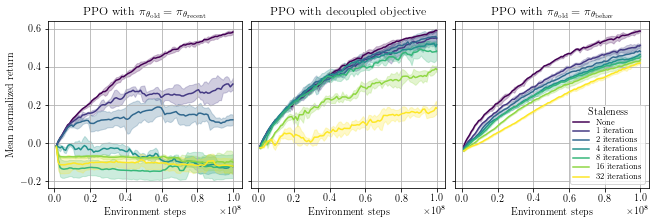

In [ ]:
plot_mean_staleness(df_mean_tree)

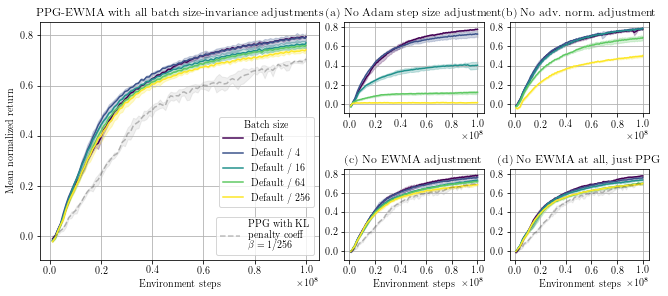

In [ ]:
plot_mean_main(df_mean_tree)

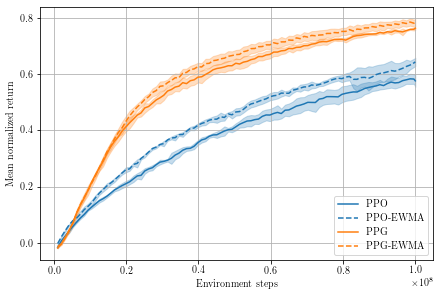

In [ ]:
plot_mean_head_to_head(df_mean_tree)

# Plot per-environment results

In [ ]:
ENVS = [
    "CoinRun",
    "StarPilot",
    "CaveFlyer",
    "Dodgeball",
    "FruitBot",
    "Chaser",
    "Miner",
    "Jumper",
    "Leaper",
    "Maze",
    "BigFish",
    "Heist",
    "Climber",
    "Plunder",
    "Ninja",
    "BossFight",
]


def plot_main(df_tree, *, reward_key="reward", plot_reference=False):
    for tree_path in [("main",)] + [("ablations", ablation) for ablation in ABLATIONS]:
        print("_".join(tree_path))
        fig = plt.figure(figsize=(10, 9), constrained_layout=True)
        for env_num, env in enumerate(ENVS):
            ax = plt.subplot(4, 4, env_num + 1)
            plot_batch_size_invariance(
                df_tree,
                reward_key=reward_key,
                tree_path=(tree_path + (env.lower(),)),
                ax=ax,
            )
            if plot_reference:
                plot_small_kl_penalty(
                    df_tree, reward_key=reward_key, env_name=env.lower(), ax=ax
                )
            if env_num == 11 and plot_reference:
                handles, labels = ax.get_legend_handles_labels()
                ax.legend(
                    handles=handles[:5],
                    labels=labels[:5],
                    loc="center left",
                    bbox_to_anchor=(1, 0.5),
                    title="Batch size",
                )
            if env_num == 15 and not plot_reference:
                ax.legend(
                    loc="lower right", title="Batch size", fontsize=8, labelspacing=0.25
                )
            if env_num == 15 and plot_reference:
                handles, labels = ax.get_legend_handles_labels()
                ax.legend(
                    handles=handles[-1:],
                    labels=labels[-1:],
                    loc="center left",
                    bbox_to_anchor=(1, 0.5),
                )
            ax.set_title(env)
            if env_num // 4 == 3:
                ax.set_xlabel("Environment steps")
            else:
                ax.set_xticklabels([])
            if env_num % 4 == 0:
                ax.set_ylabel(FIELD_LABELS[reward_key])
            for tick in ax.xaxis.get_major_ticks() + ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(8)
        save_path = tree_path
        if not reward_key.startswith("reward"):
            save_path += (reward_key.rsplit("/", 1)[-1],)
        plt.savefig(
            os.path.expanduser(f"~/{'_'.join(save_path)}.pgf"), bbox_inches="tight"
        )


def plot_staleness(df_tree):
    for staleness_loss_num, staleness_loss in enumerate(STALENESS_LOSSES):
        print(staleness_loss)
        fig = plt.figure(figsize=(10, 9), constrained_layout=True)
        for env_num, env in enumerate(ENVS):
            ax = plt.subplot(4, 4, env_num + 1)
            df_subtree = df_tree["staleness"][staleness_loss][env.lower()]
            interacts = df_subtree["mean"]["interacts"]
            reward_mean = df_subtree["mean"]["reward"]
            reward_std = df_subtree["std"]["reward"]
            labels = ["None", "1 iteration"] + [
                f"{2**n} iterations" for n in range(1, 6)
            ]
            colors = [
                plt.get_cmap("viridis")(x)
                for x in np.linspace(0, 1, len(interacts.columns))
            ]
            for col_name, label, color in zip(interacts.columns, labels, colors):
                ax.plot(
                    interacts[col_name],
                    reward_mean[col_name],
                    label=label,
                    color=color,
                    linewidth=0.5,
                )
                ax.fill_between(
                    interacts[col_name],
                    reward_mean[col_name] - reward_std[col_name],
                    reward_mean[col_name] + reward_std[col_name],
                    color=color,
                    alpha=0.25,
                )
            if env_num == 15:
                ax.legend(
                    loc="lower right", title="Staleness", fontsize=8, labelspacing=0.25
                )
            ax.set_title(env)
            if env_num // 4 == 3:
                ax.set_xlabel("Environment steps")
            else:
                ax.set_xticklabels([])
            if env_num % 4 == 0:
                ax.set_ylabel(FIELD_LABELS["reward"])
            for tick in ax.xaxis.get_major_ticks() + ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(8)
        plt.savefig(
            os.path.expanduser(f"~/staleness_{staleness_loss}.pgf"), bbox_inches="tight"
        )


def plot_head_to_head(df_tree, *, reward_key="reward", save=False):
    fig = plt.figure(figsize=(10, 9), constrained_layout=True)
    for env_num, env in enumerate(ENVS):
        ax = plt.subplot(4, 4, env_num + 1)
        interacts = df_tree["head_to_head"][env.lower()]["mean"]["interacts"]
        reward_mean = df_tree["head_to_head"][env.lower()]["mean"][reward_key]
        reward_std = df_tree["head_to_head"][env.lower()]["std"][reward_key]
        labels = ["PPG-EWMA", "PPG", "PPO-EWMA", "PPO"]
        colors = ["C1", "C1", "C0", "C0"]
        linestyles = ["--", "-", "--", "-"]
        for col_name, label, color, linestyle in reversed(
            list(zip(interacts.columns, labels, colors, linestyles))
        ):
            ax.plot(
                interacts[col_name],
                reward_mean[col_name],
                label=label,
                color=color,
                linestyle=linestyle,
                linewidth=0.5,
            )
            ax.fill_between(
                interacts[col_name],
                reward_mean[col_name] - reward_std[col_name],
                reward_mean[col_name] + reward_std[col_name],
                color=color,
                alpha=0.25,
            )
        if env_num == 15:
            ax.legend(loc="lower right")
        ax.set_title(env)
        if env_num // 4 == 3:
            ax.set_xlabel("Environment steps")
        else:
            ax.set_xticklabels([])
        if env_num % 4 == 0:
            ax.set_ylabel(FIELD_LABELS[reward_key])
        for tick in ax.xaxis.get_major_ticks() + ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(8)
    filename = "head_to_head"
    if not reward_key.startswith("reward"):
        filename = f"{filename}_{reward_key.rsplit('/', 1)[-1]}"
    if save:
        plt.savefig(os.path.expanduser(f"~/{filename}.pgf"), bbox_inches="tight")
    else:
        plt.show()

proximal
decoupled
behavior


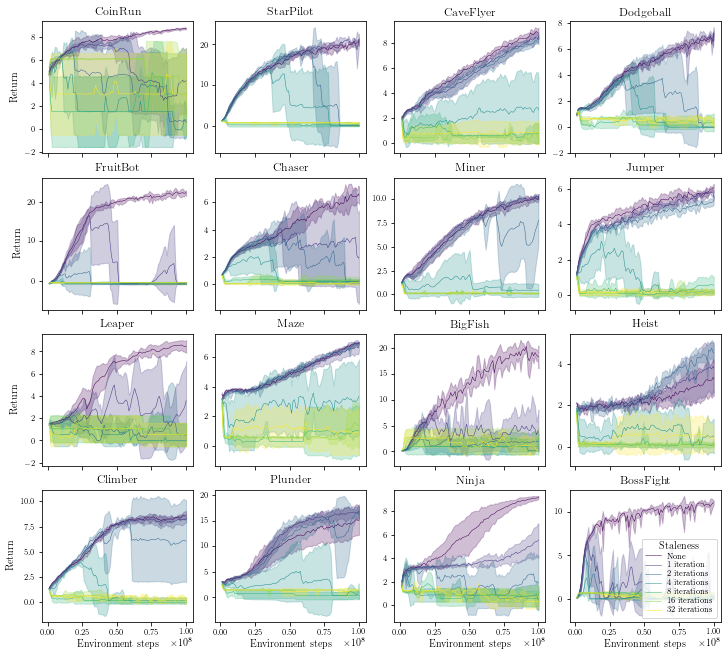

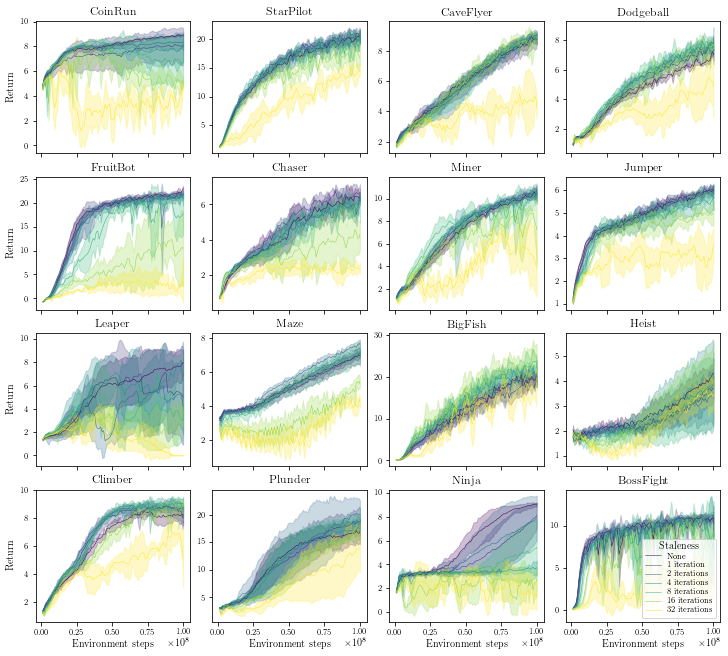

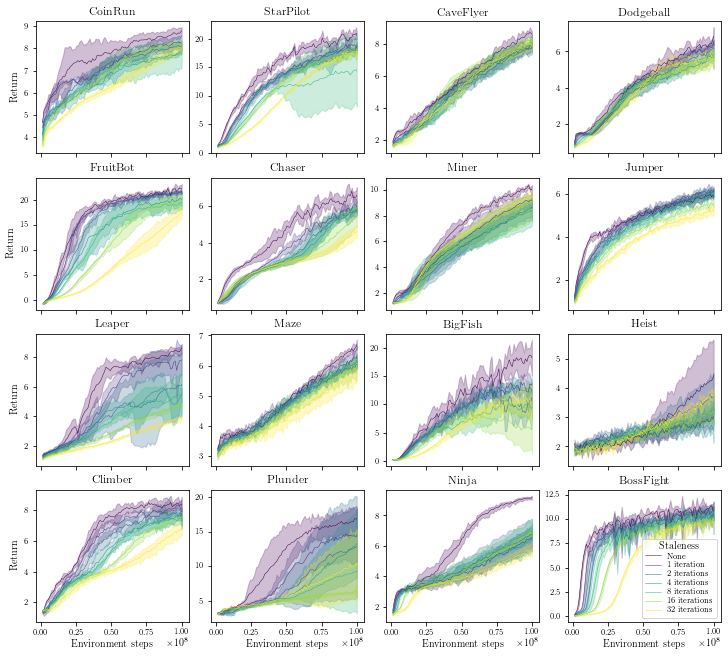

In [ ]:
plot_staleness(df_tree)

main
ablations_no_lr
ablations_no_adv_norm_ewma
ablations_fixed_prox_ewma
ablations_no_prox_ewma


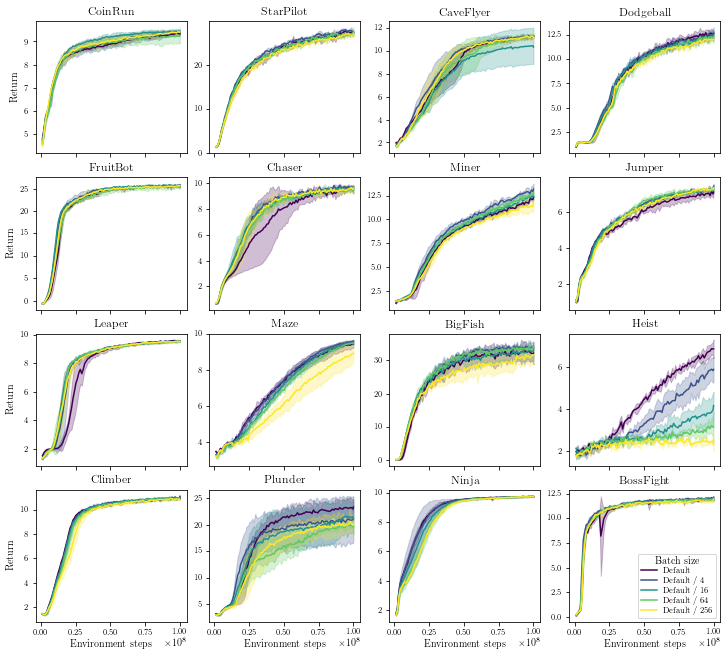

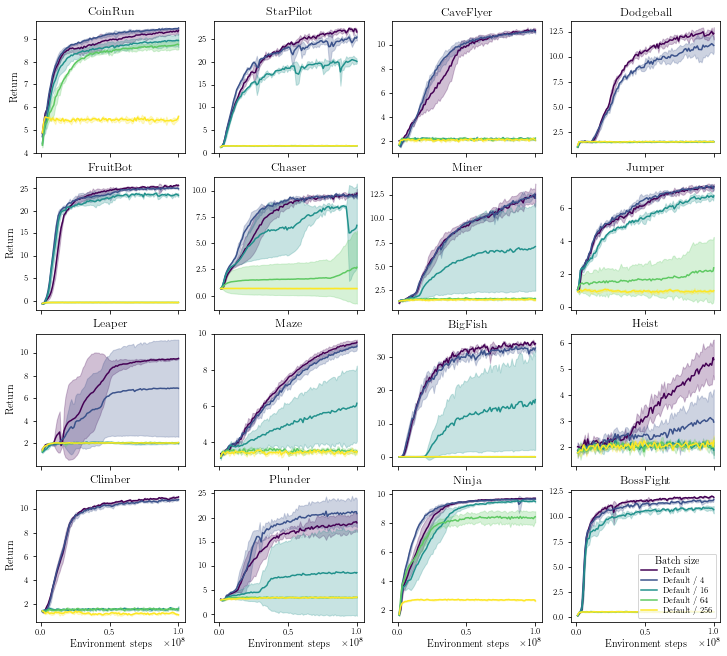

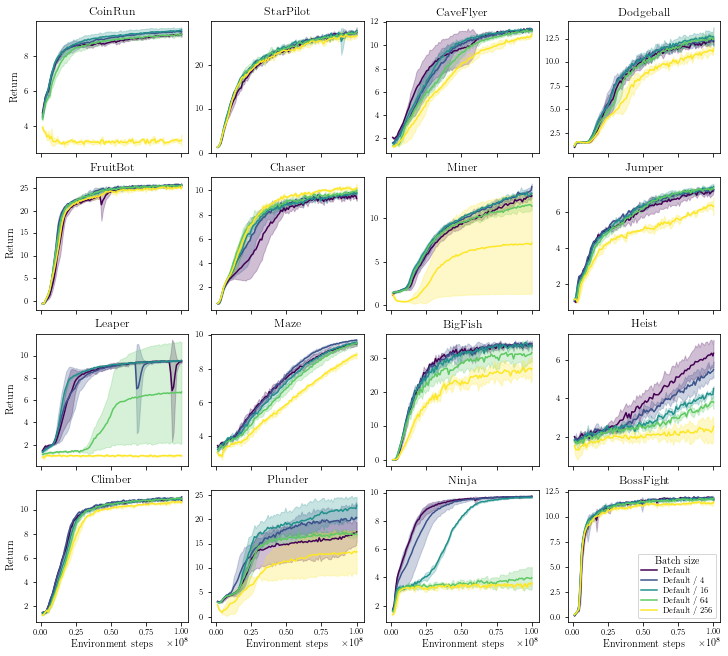

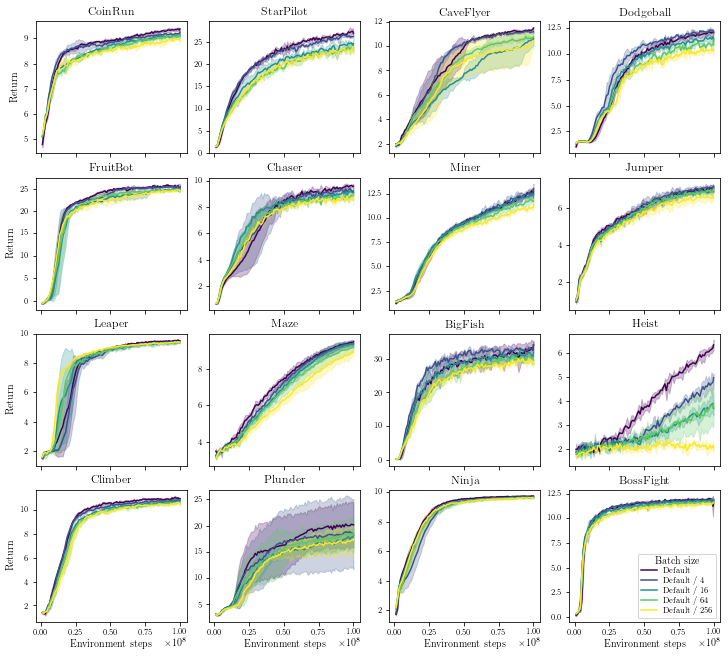

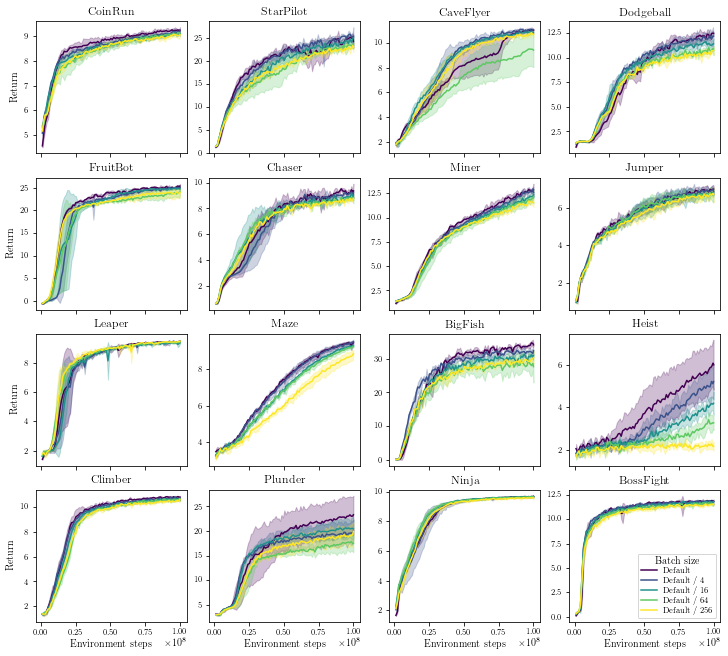

In [ ]:
plot_main(df_tree)

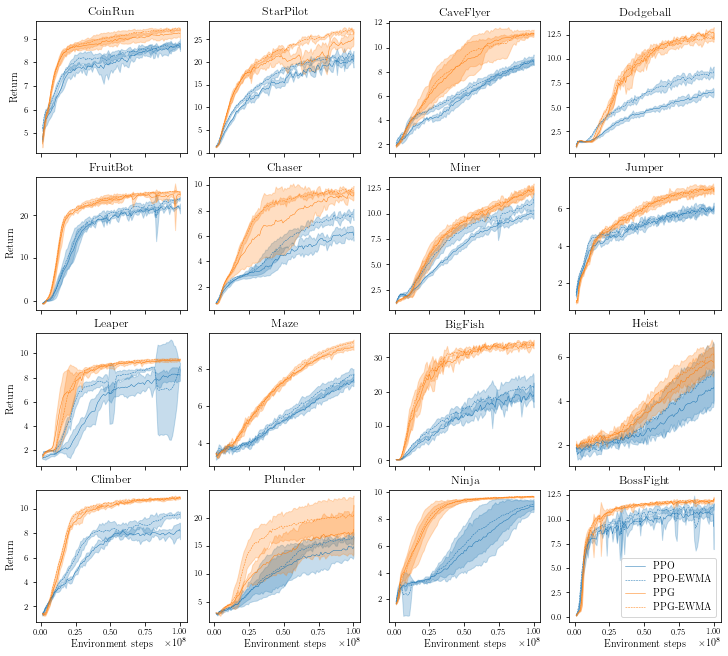

In [ ]:
plot_head_to_head(df_tree)

# Other plots

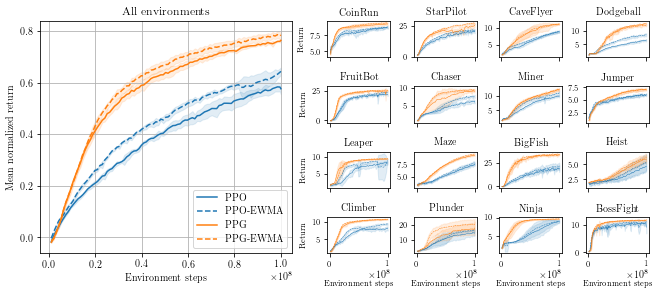

In [ ]:
def plot_both_head_to_head(df_tree, df_mean_tree, *, reward_key=None, save=False):
    if reward_key is None:
        reward_mean_key = "reward_norm"
        reward_key = "reward"
    else:
        reward_mean_key = reward_key
    fig = plt.figure(figsize=(9, 6), constrained_layout=True)
    ax = plt.subplot2grid((8, 8), (0, 0), rowspan=4, colspan=4)
    interacts = df_mean_tree["head_to_head"]["mean"]["interacts"]
    reward_mean = df_mean_tree["head_to_head"]["mean"][reward_mean_key]
    reward_std = df_mean_tree["head_to_head"]["std"][reward_mean_key]
    labels = ["PPG-EWMA", "PPG", "PPO-EWMA", "PPO"]
    colors = ["C1", "C1", "C0", "C0"]
    linestyles = ["--", "-", "--", "-"]
    for col_name, label, color, linestyle in reversed(
        list(zip(interacts.columns, labels, colors, linestyles))
    ):
        ax.plot(
            interacts[col_name],
            reward_mean[col_name],
            label=label,
            color=color,
            linestyle=linestyle,
        )
        ax.fill_between(
            interacts[col_name],
            reward_mean[col_name] - reward_std[col_name],
            reward_mean[col_name] + reward_std[col_name],
            color=color,
            alpha=0.125,
        )
    ax.legend(loc="lower right")
    ax.grid()
    ax.set_title("All environments")
    ax.set_xlabel("Environment steps")
    ax.set_ylabel(FIELD_LABELS[reward_mean_key])
    for env_num, env in enumerate(ENVS):
        ax = plt.subplot2grid((8, 8), (env_num // 4, 4 + env_num % 4))
        interacts = df_tree["head_to_head"][env.lower()]["mean"]["interacts"]
        reward_mean = df_tree["head_to_head"][env.lower()]["mean"][reward_key]
        reward_std = df_tree["head_to_head"][env.lower()]["std"][reward_key]
        labels = ["PPG-EWMA", "PPG", "PPO-EWMA", "PPO"]
        colors = ["C1", "C1", "C0", "C0"]
        linestyles = ["--", "-", "--", "-"]
        for col_name, label, color, linestyle in reversed(
            list(zip(interacts.columns, labels, colors, linestyles))
        ):
            ax.plot(
                interacts[col_name],
                reward_mean[col_name],
                label=label,
                color=color,
                linestyle=linestyle,
                linewidth=0.5,
            )
            ax.fill_between(
                interacts[col_name],
                reward_mean[col_name] - reward_std[col_name],
                reward_mean[col_name] + reward_std[col_name],
                color=color,
                alpha=0.125,
            )
        ax.set_title(env, fontsize=10)
        if env_num // 4 == 3:
            ax.set_xlabel("\nEnvironment steps", fontsize=8)
        else:
            ax.set_xticklabels([])
        if env_num % 4 == 0:
            ax.set_ylabel(FIELD_LABELS[reward_key], fontsize=8)
        for tick in ax.xaxis.get_major_ticks() + ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(8)
    filename = "head_to_head"
    if not reward_key.startswith("reward"):
        filename = f"{filename}_{reward_key.rsplit('/', 1)[-1]}"
    if save:
        plt.savefig(os.path.expanduser(f"~/{filename}.pgf"), bbox_inches="tight")
    else:
        plt.show()


plot_both_head_to_head(df_tree, df_mean_tree, save=True)

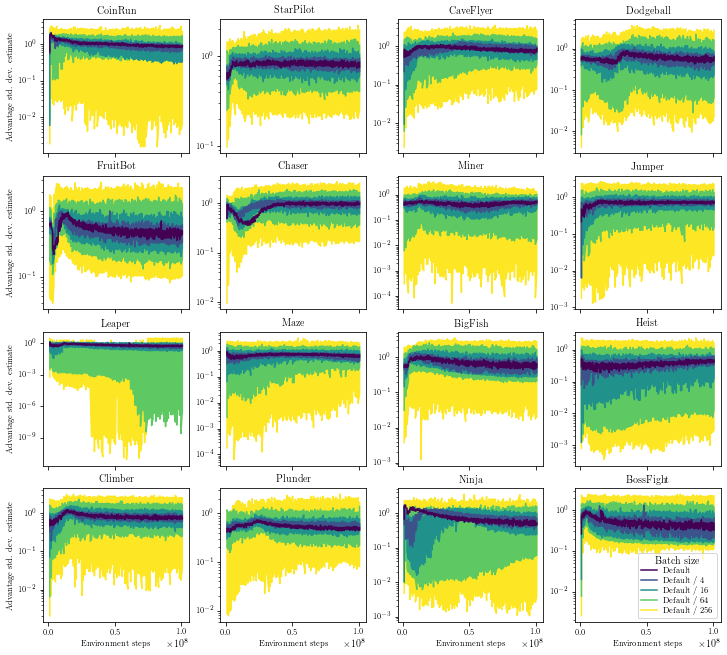

In [ ]:
def plot_chunked(x, y, *, x_chunk, ax, **kwargs):
    df = pd.DataFrame({"x": x, "y_min": y, "y_max": y})
    df["x"] = (((df["x"] - 1) // x_chunk) + 1) * x_chunk
    df = df.groupby("x").agg({"y_min": "min", "y_max": "max"}).reset_index()
    ax.plot(
        df["x"].repeat(2).reset_index(drop=True),
        pd.concat([df["y_min"], df["y_max"]]).sort_index().reset_index(drop=True),
        **kwargs,
    )


def plot_adv_stds(df_tree):
    fig = plt.figure(figsize=(10, 9), constrained_layout=True)
    for env_num, env in enumerate(ENVS):
        ax = plt.subplot(4, 4, env_num + 1)
        df_subtree = df_tree["ablations"]["no_adv_norm_ewma"][env.lower()]["adv"]
        interacts = df_subtree["interacts"]
        adv_std = df_subtree["VFStats/AdvStd"]
        labels = ["Default"] + [f"Default / {2**(2*n)}" for n in range(1, 5)]
        colors = [plt.get_cmap("viridis")(x) for x in np.linspace(0, 1, len(labels))]
        for col_num, col_name in reversed(list(enumerate(interacts.columns[:5]))):
            label = labels[col_num % len(labels)]
            color = colors[col_num % len(colors)]
            plot_chunked(
                interacts[col_name],
                adv_std[col_name],
                x_chunk=INTERACTS_INCREMENT,
                ax=ax,
                label=label,
                color=color,
            )
        ax.set_yscale("log")
        if env_num == 15:
            handles, labels = ax.get_legend_handles_labels()
            ax.legend(
                handles=reversed(handles[:5]),
                labels=reversed(labels[:5]),
                loc="lower right",
                title="Batch size",
                fontsize=8,
                labelspacing=0.25,
            )
        ax.set_title(env, fontsize=10)
        if env_num // 4 == 3:
            ax.set_xlabel("Environment steps", fontsize=8)
        else:
            ax.set_xticklabels([])
        if env_num % 4 == 0:
            ax.set_ylabel("Advantage std. dev. estimate", fontsize=8)
        for tick in ax.xaxis.get_major_ticks() + ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(8)
    plt.savefig(os.path.expanduser("~/adv_norm_stds.pgf"), bbox_inches="tight")


plot_adv_stds(df_tree)

main
ablations_no_lr
ablations_no_adv_norm_ewma
ablations_fixed_prox_ewma
ablations_no_prox_ewma


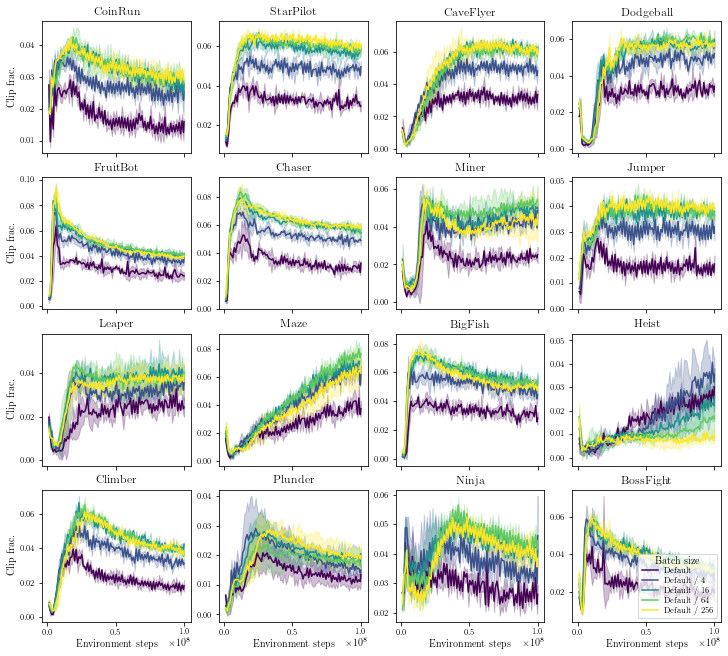

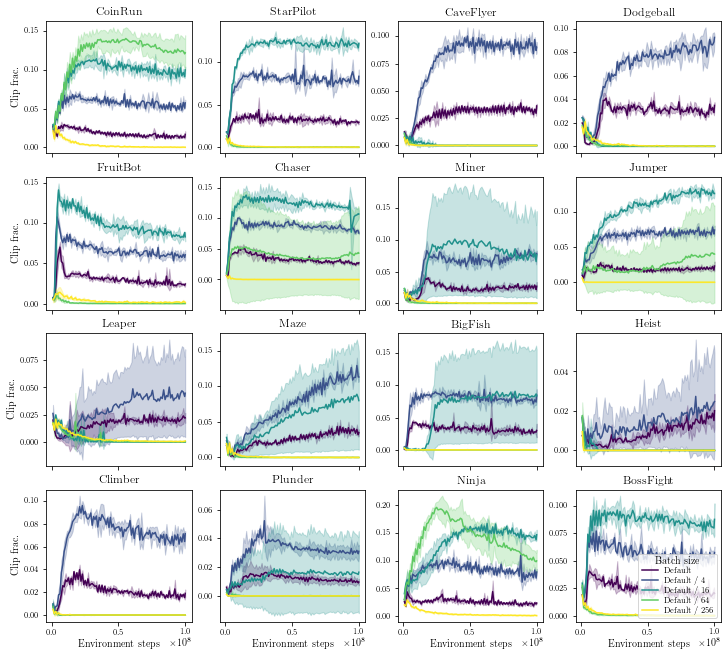

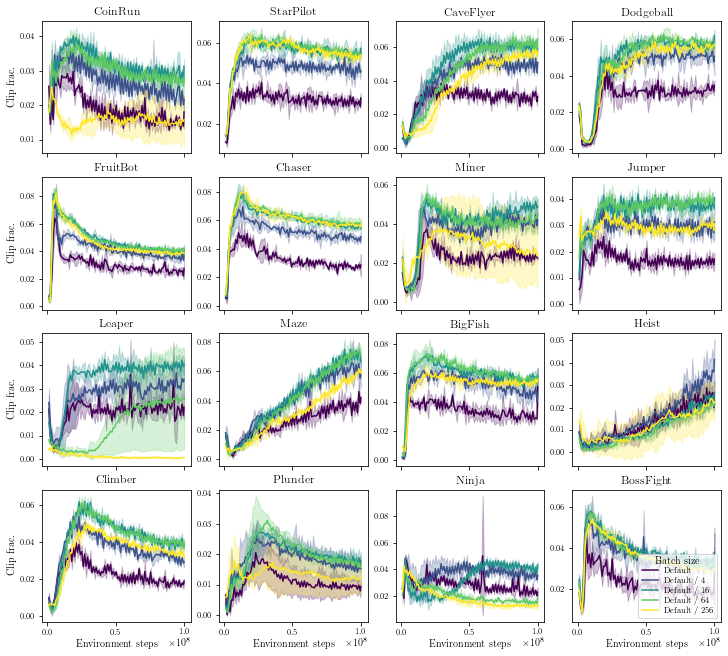

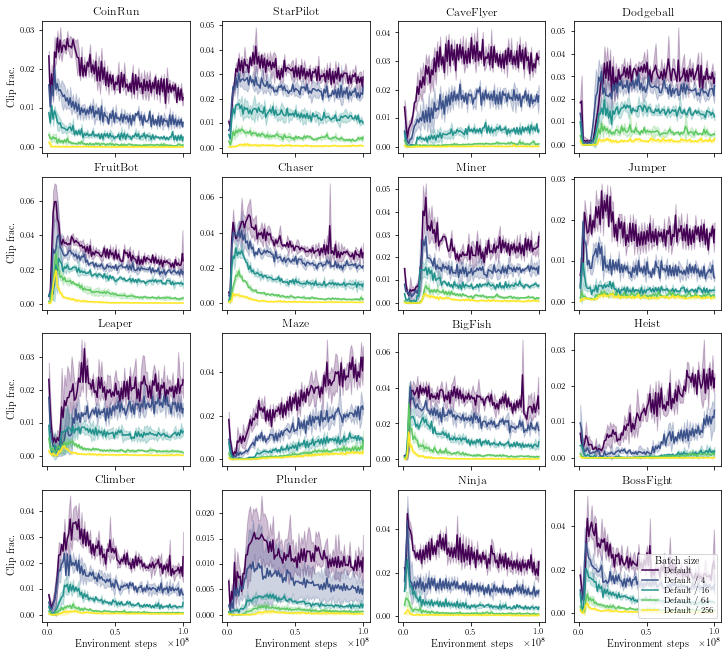

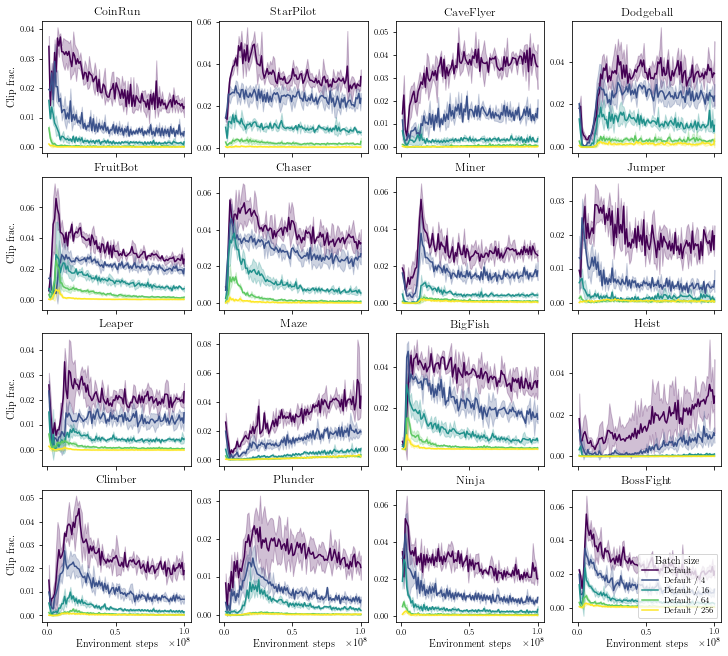

In [ ]:
plot_main(df_tree, reward_key="Opt/clipfrac")

main
ablations_no_lr
ablations_no_adv_norm_ewma
ablations_fixed_prox_ewma
ablations_no_prox_ewma


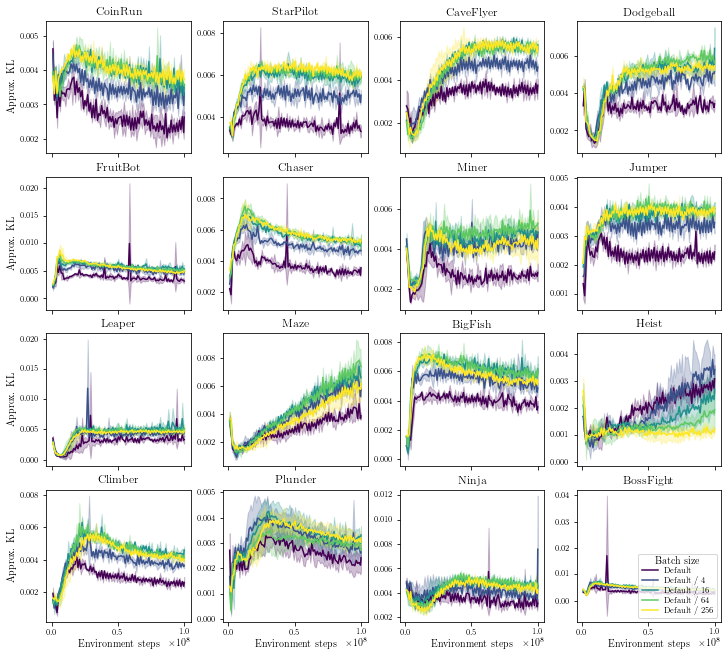

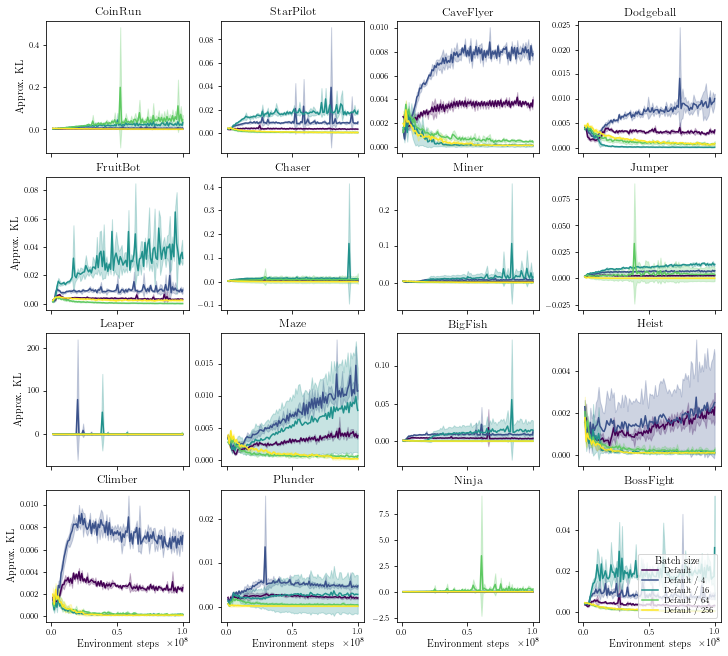

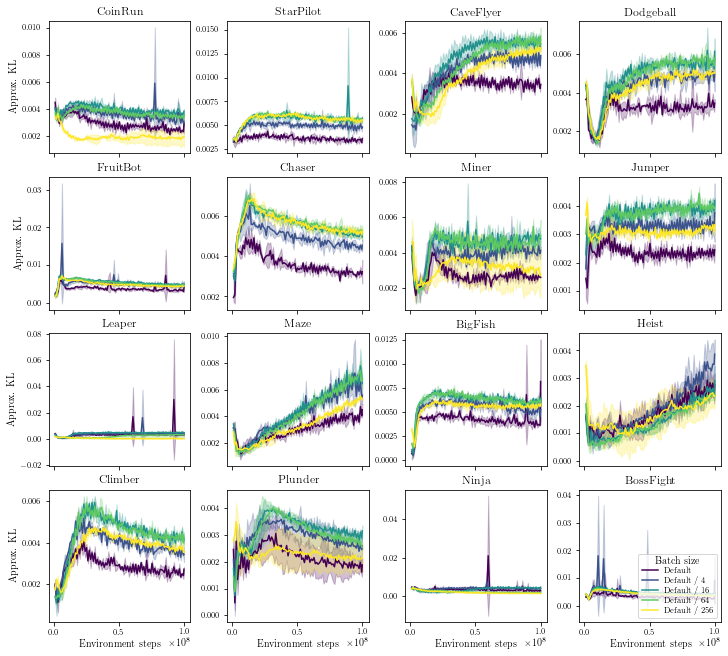

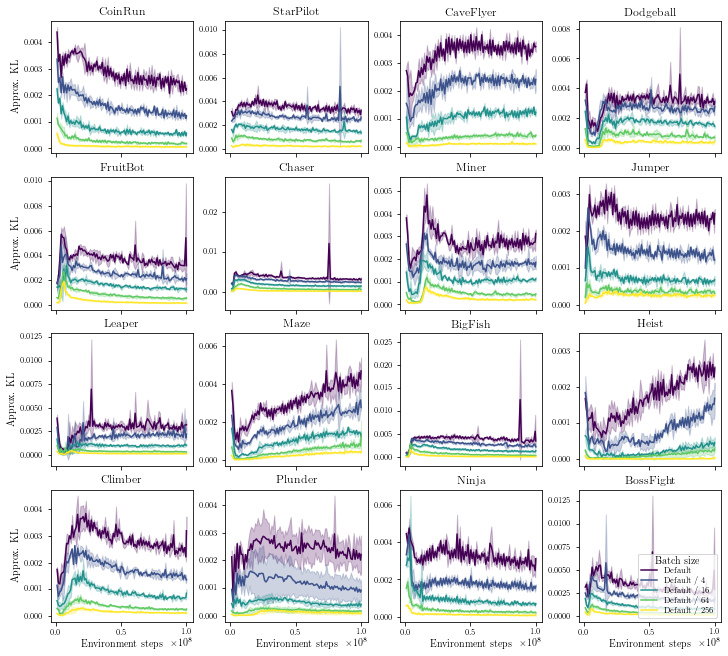

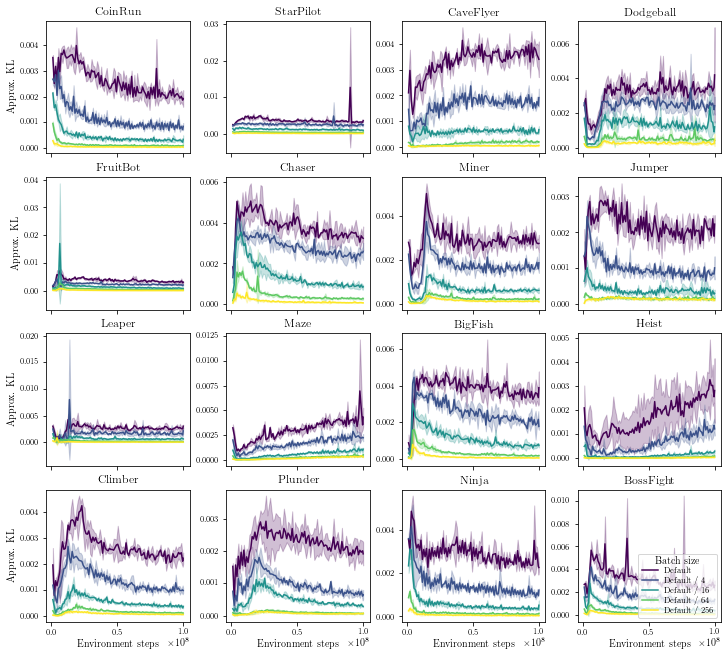

In [ ]:
plot_main(df_tree, reward_key="Opt/approxkl")

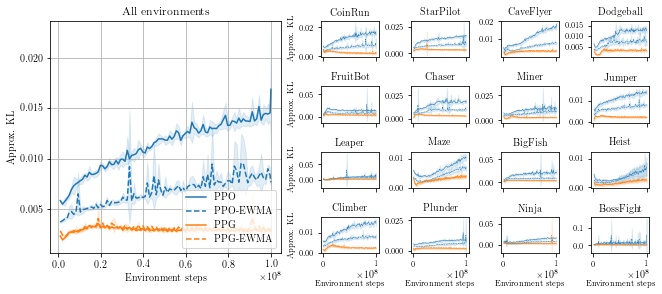

In [ ]:
plot_both_head_to_head(df_tree, df_mean_tree, reward_key="Opt/approxkl")

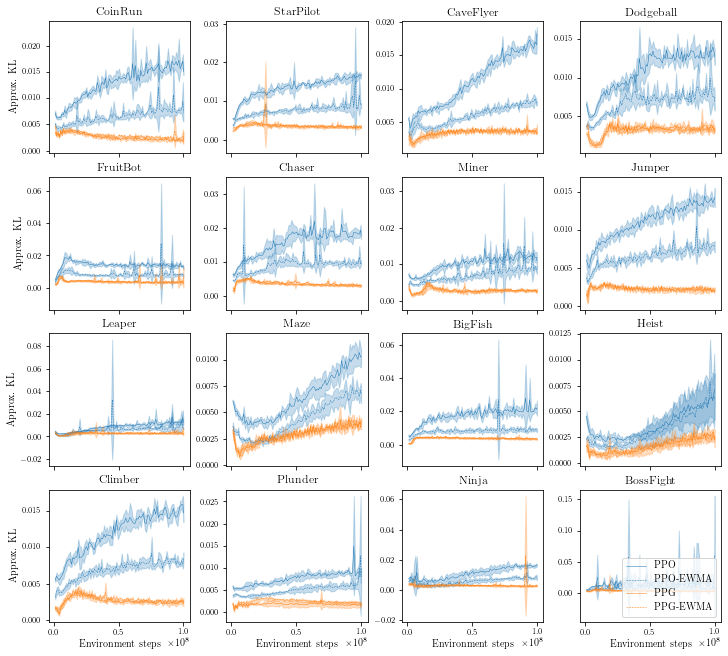

In [ ]:
plot_head_to_head(df_tree, reward_key="Opt/approxkl", save=True)

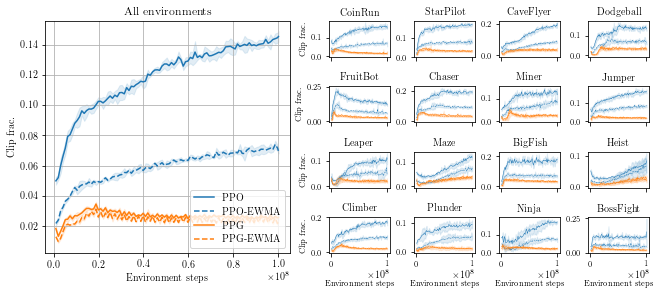

In [ ]:
plot_both_head_to_head(df_tree, df_mean_tree, reward_key="Opt/clipfrac")

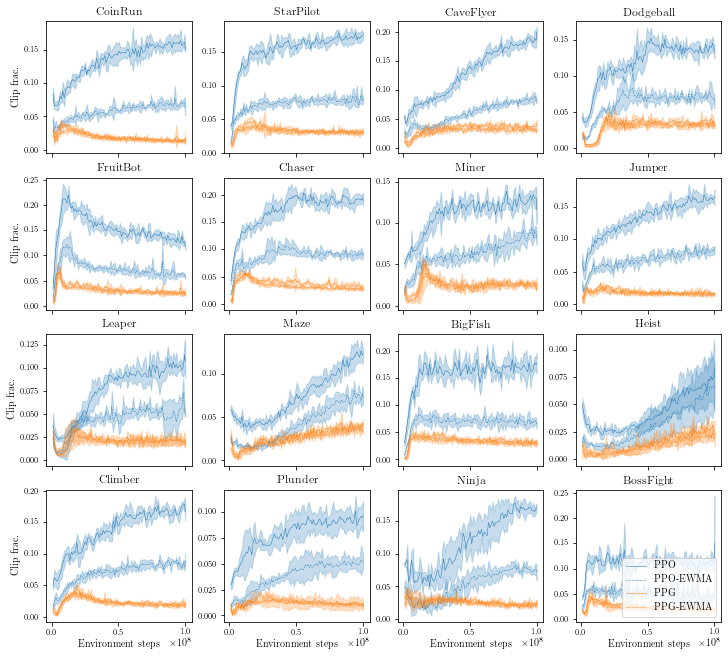

In [ ]:
plot_head_to_head(df_tree, reward_key="Opt/clipfrac", save=True)

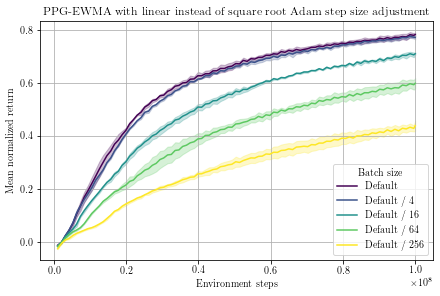

In [ ]:
def plot_mean_linear_lr(df_mean_tree):
    plt.figure(figsize=(6, 4), constrained_layout=True)
    ax = plt.gca()
    plot_batch_size_invariance(
        df_mean_tree, tree_path=("ablations", "linear_lr"), ax=ax
    )
    ax.legend(loc="lower right", title="Batch size")
    ax.grid()
    ax.set_title(
        "PPG-EWMA with linear instead of square root Adam step size adjustment"
    )
    ax.set_xlabel("Environment steps")
    ax.set_ylabel(FIELD_LABELS["reward_norm"])
    plt.savefig(os.path.expanduser("~/linear_lr.pgf"), bbox_inches="tight")


plot_mean_linear_lr(df_mean_tree)

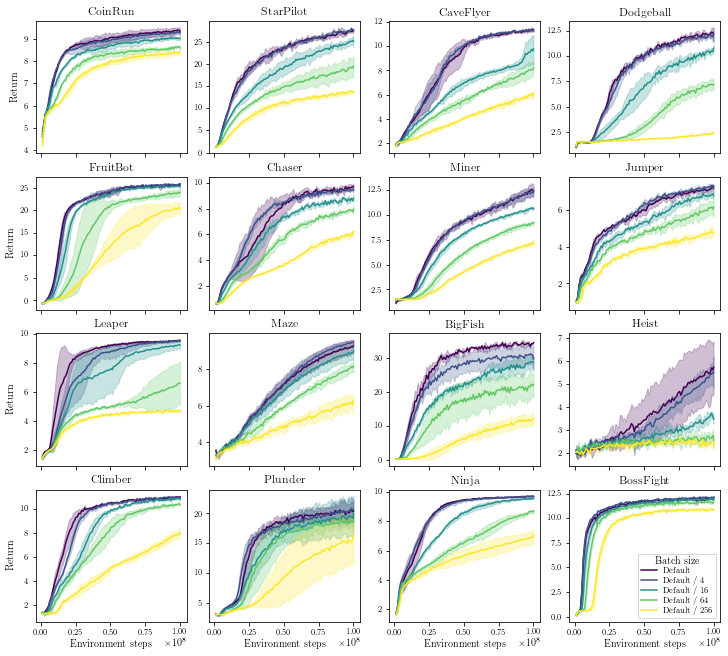

In [ ]:
def plot_linear_lr(df_tree, *, reward_key="reward"):
    tree_path = ("ablations", "linear_lr")
    fig = plt.figure(figsize=(10, 9), constrained_layout=True)
    for env_num, env in enumerate(ENVS):
        ax = plt.subplot(4, 4, env_num + 1)
        plot_batch_size_invariance(
            df_tree,
            reward_key=reward_key,
            tree_path=(tree_path + (env.lower(),)),
            ax=ax,
        )
        if env_num == 15:
            ax.legend(
                loc="lower right", title="Batch size", fontsize=8, labelspacing=0.25
            )
        ax.set_title(env)
        if env_num // 4 == 3:
            ax.set_xlabel("Environment steps")
        else:
            ax.set_xticklabels([])
        if env_num % 4 == 0:
            ax.set_ylabel(FIELD_LABELS[reward_key])
        for tick in ax.xaxis.get_major_ticks() + ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(8)
    save_path = tree_path
    if not reward_key.startswith("reward"):
        save_path += (reward_key.rsplit("/", 1)[-1],)
    plt.savefig(os.path.expanduser(f"~/{'_'.join(save_path)}.pgf"), bbox_inches="tight")


plot_linear_lr(df_tree)

In [ ]:
def discrete_heatmap(ys, xs, zs, *, fig, ax):
    ax = plt.gca()
    y_idxs, y_labels = zip(*sorted(enumerate(ys), key=lambda p: p[1]))
    x_idxs, x_labels = zip(*sorted(enumerate(xs), key=lambda p: p[1]))
    z_values = np.zeros_like(zs)
    for y_pos, y_idx in enumerate(y_idxs):
        for x_pos, x_idx in enumerate(x_idxs):
            z_values[y_pos, x_pos] = zs[y_idx][x_idx]
    c = ax.imshow(z_values)
    fig.colorbar(c, ax=ax)
    ax.set_xticks(np.arange(len(x_labels)))
    ax.set_yticks(np.arange(len(y_labels)))
    ax.set_xlim(-0.5, len(x_labels) - 0.5)
    ax.set_ylim(-0.5, len(y_labels) - 0.5)
    ax.set_xticklabels(x_labels)
    ax.set_yticklabels(y_labels)

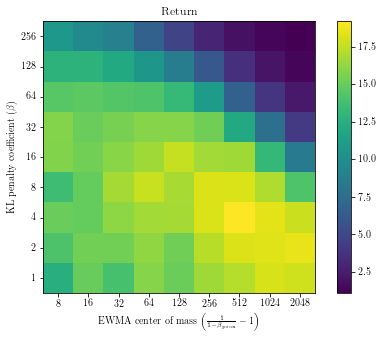

In [ ]:
def plot_kl_penalty_vs_ewma(result_tree):
    rewards_by_metadata = {}
    for result in result_tree["other"]["kl_penalty_vs_ewma"]["starpilot"]:
        df = result["progress_raw"]
        df = df[
            df["Misc/InteractCount"]
            > df["Misc/InteractCount"].max() - INTERACTS_INCREMENT
        ]
        reward = (df["NewEpNum"] * df["NewEpRewMean"]).sum() / df["NewEpNum"].sum()
        kl_ewma_horizon = int(
            round((1 / (1 - result["metadata"]["kl_ewma_decay"]) - 1))
        )
        kl_penalty = result["metadata"]["kl_penalty"]
        metadata_key = (kl_penalty, kl_ewma_horizon)
        if metadata_key not in rewards_by_metadata:
            rewards_by_metadata[metadata_key] = []
        rewards_by_metadata[metadata_key].append(reward)
    for metadata_key in rewards_by_metadata.keys():
        rewards_by_metadata[metadata_key] = np.mean(rewards_by_metadata[metadata_key])
    ys = sorted(set([metadata_key[0] for metadata_key in rewards_by_metadata.keys()]))
    xs = sorted(set([metadata_key[1] for metadata_key in rewards_by_metadata.keys()]))
    zs = []
    for y in ys:
        zs.append([])
        for x in xs:
            zs[-1].append(rewards_by_metadata[(y, x)])
    fig, ax = plt.subplots(figsize=(8, 5))
    discrete_heatmap(ys, xs, zs, fig=fig, ax=ax)
    ax.set_title("Return")
    ax.set_xlabel(
        "EWMA center of mass $\\left(\\frac{1}{1-\\beta_{\\mathrm{prox}}}-1\\right)$"
    )
    ax.set_ylabel("KL penalty coefficient $\\left(\\beta\\right)$")
    plt.savefig(os.path.expanduser("~/kl_penalty_vs_ewma.pgf"), bbox_inches="tight")


plot_kl_penalty_vs_ewma(result_tree)